In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("2017.csv",index_col="date",parse_dates=[0])
data

,speed
date,
2017-01-01 00:00:00,43.002930
2017-01-01 01:00:00,46.118696
2017-01-01 02:00:00,44.294158
2017-01-01 03:00:00,41.067468
2017-01-01 04:00:00,46.448653
...,...
2017-12-31 19:00:00,44.742372
2017-12-31 20:00:00,46.428155
2017-12-31 21:00:00,43.059179


In [3]:
data.describe()

,speed
count,8760.000000
mean,32.624632
std,13.659118
min,4.508190
25%,19.001981
50%,36.318028
75%,45.878952
max,53.161286


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


Text(0, 0.5, 'Hourly Driving speed')

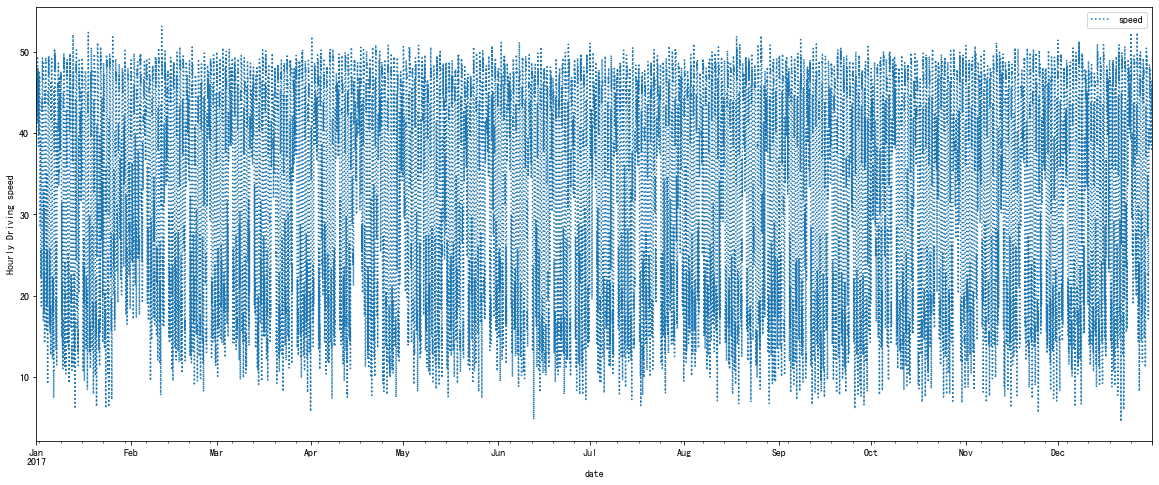

In [5]:
# use pandas internal drawing function for visualizetion
data.plot(style=[':','--','-'], figsize=(20,8))
plt.ylabel('Hourly Driving speed')
# density is too large, cannot discover the common

Text(0, 0.5, 'Hourly Driving speed')

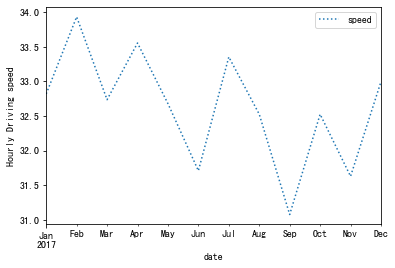

In [6]:
weekly = data.resample('m').mean()
weekly.plot(style=[':',"--",'-'])
plt.ylabel('Hourly Driving speed')

Text(0, 0.5, 'mean of 30 days')

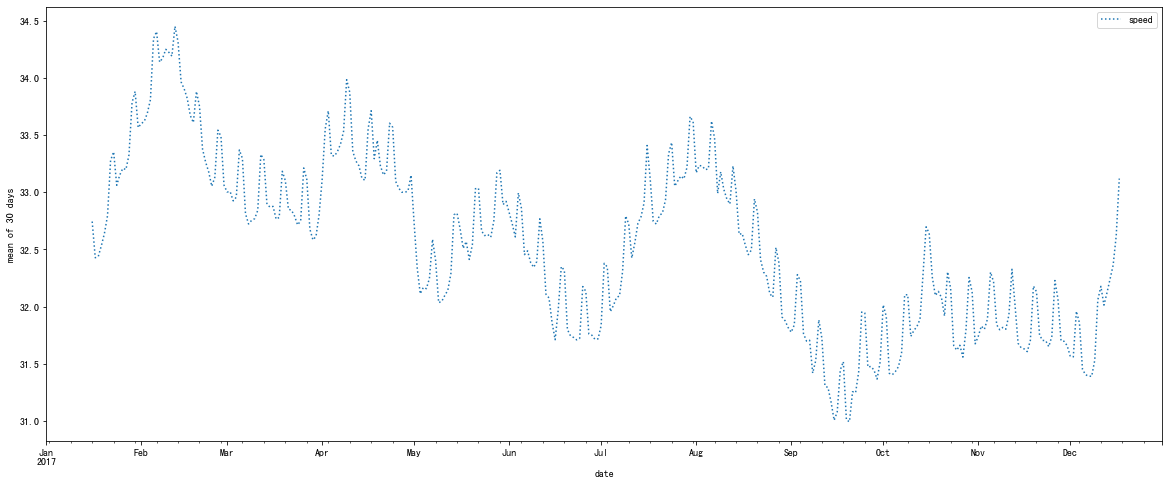

In [7]:
daily = data.resample('d').mean()
daily.rolling(30,center=True).mean().plot(style=[':',"--",'-'], figsize=(20,8))
plt.ylabel('mean of 30 days')

Text(0, 0.5, 'mean of hours')

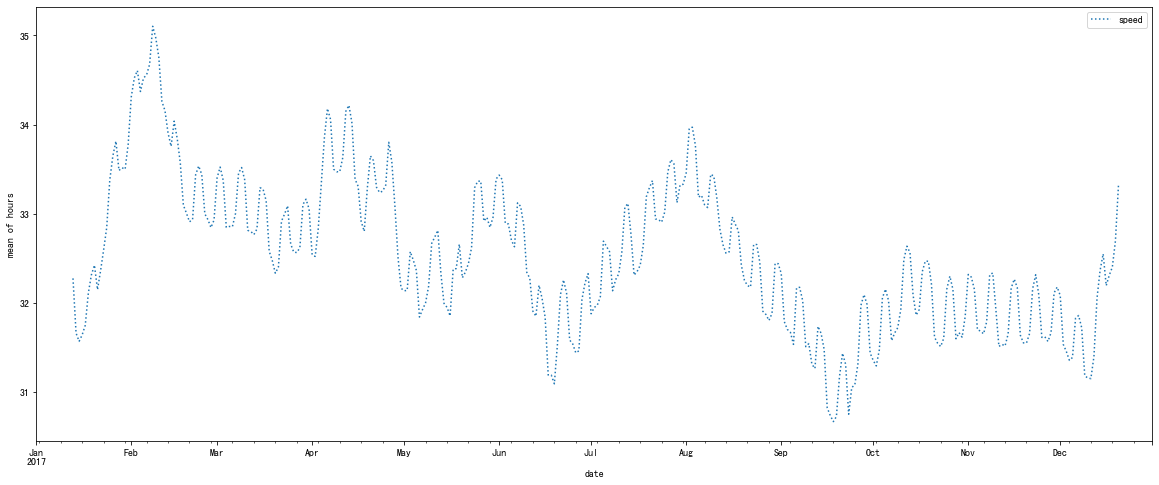

In [8]:
hourly = data.resample('h')
daily.rolling(24,center=True).mean().plot(style=[':',"--",'-'],figsize=(20,8))
plt.ylabel('mean of hours')

In [9]:
data.index.date

array([datetime.date(2017, 1, 1), datetime.date(2017, 1, 1),
       datetime.date(2017, 1, 1), ..., datetime.date(2017, 12, 31),
       datetime.date(2017, 12, 31), datetime.date(2017, 12, 31)],
      dtype=object)

In [10]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

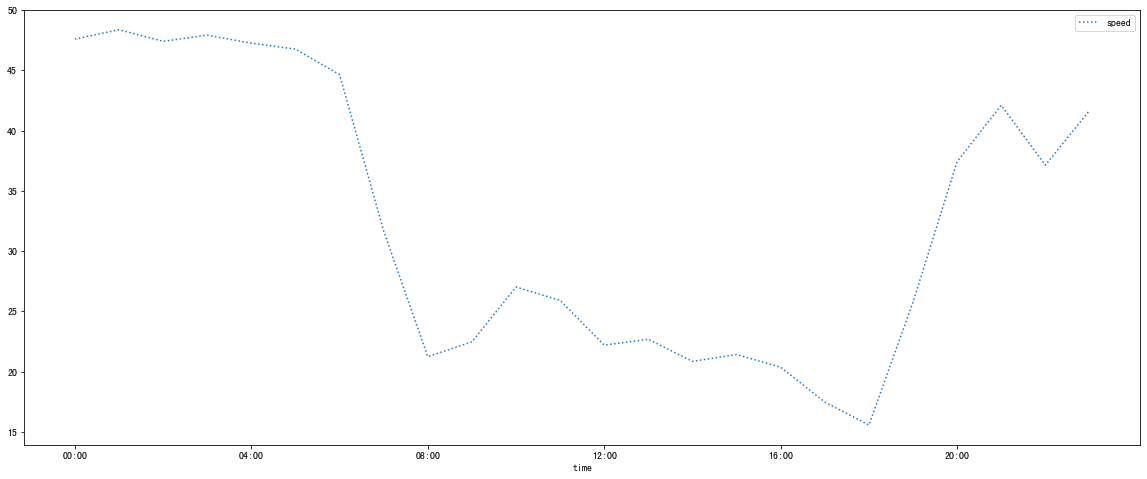

In [11]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':',"--",'-'],figsize=(20,8))

          speed
date           
0     31.144806
1     30.643669
2     30.645765
3     30.589388
4     29.582826
5     33.203171
6     42.375287


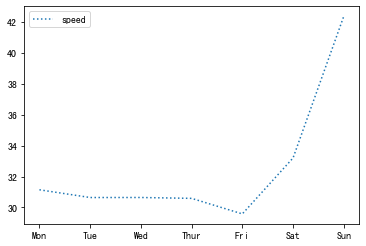

In [12]:
by_weekday = data.groupby(data.index.dayofweek).mean()
print(by_weekday)
by_weekday.index=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
by_weekday.plot(style=[':',"--",'-'])

In [13]:
data.index.weekday.unique()

Int64Index([6, 0, 1, 2, 3, 4, 5], dtype='int64', name='date')

In [14]:
weekend = np.where(data.index.weekday<5,'weekday','weekend')
weekend

array(['weekend', 'weekend', 'weekend', ..., 'weekend', 'weekend',
       'weekend'], dtype='<U7')

In [15]:
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

speed
weekday 00:00:00  48.101083
        01:00:00  48.476998
        02:00:00  47.299616
        03:00:00  47.961053
        04:00:00  47.081885
        05:00:00  46.709263
        06:00:00  44.060533
        07:00:00  27.402735
        08:00:00  15.122439
        09:00:00  17.946743
        10:00:00  24.350249
        11:00:00  23.053450
        12:00:00  18.345020
        13:00:00  19.382582
        14:00:00  16.965506
        15:00:00  18.056123
        16:00:00  16.796958
        17:00:00  12.689847
        18:00:00  11.032260
        19:00:00  21.365561
        20:00:00  35.577422
        21:00:00  43.966615
        22:00:00  38.302165
        23:00:00  42.464869
weekend 00:00:00  46.372420
        01:00:00  48.144623
        02:00:00  47.699616
        03:00:00  47.849831
        04:00:00  47.710949
        05:00:00  46.924273
        06:00:00  46.092127
        07:00:00  42.210086
        08:00:00  36.393412
        09:00:00  33.675144
        10:00:00  33.639600
        11:00:00  32.991910
        12:00:00  31.736008
        13:00:00  30.858491
        14:00:00  30.467103
        15:00:00  29.749973
        16:00:00  29.188586
        17:00:00  29.324074
        18:00:00  26.794464
        19:00:00  36.682251
        20:00:00  42.027545
        21:00:00  37.508657
        22:00:00  34.235745
        23:00:00  39.712847

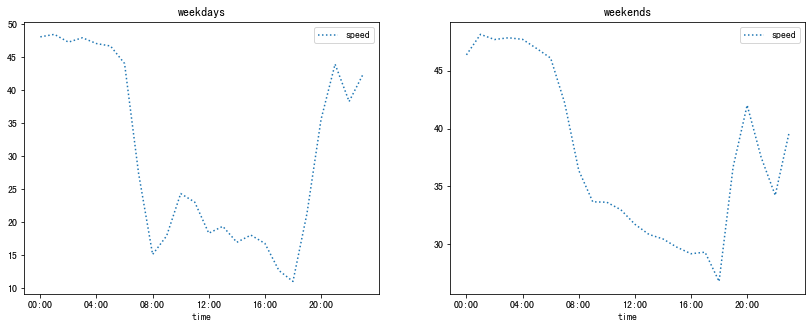

In [16]:
figsize, ax = plt.subplots(1,2,figsize=(14,5))
by_time.loc['weekday',:].plot(ax=ax[0],title='weekdays',
                             xticks=hourly_ticks, style=[':',"--",'-'])
by_time.loc['weekend',:].plot(ax=ax[1],title='weekends',
                             xticks=hourly_ticks, style=[':',"--",'-'])